In [7]:
import json
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
%matplotlib inline

In [43]:
def json_to_mask(json_name):
    im = cv2.imread("Dataset/images/"+json_name+".png")
    print(im.shape)
    f = open("Dataset/labels/"+json_name+".json")
    annotation = json.load(f)
    masks = np.zeros((len(annotation["shapes"]), im.shape[0], im.shape[1]))
    for i in range(len(annotation["shapes"])):
        points = [[int(point[0]), int(point[1])] for point in annotation["shapes"][i]["points"]]
        points = np.array(points)
        print("Points:", points)
        cv2.fillPoly(masks[i, :, :], pts=[points], color=((i + 1) * 10, 0, 0))
        print(np.mean(masks[i]))
        masks[i, :, :] = (masks[i, :, :] == (i + 1) * 10)
    return torch.from_numpy(masks)

#json_to_mask("N00271097")
        

(1024, 1024, 3)
Points: [[545 603]
 [559 597]
 [570 593]
 [578 589]
 [589 585]
 [598 590]
 [601 596]
 [595 596]
 [591 595]
 [589 596]
 [585 597]
 [584 601]
 [590 601]
 [597 600]
 [604 600]
 [610 603]
 [598 608]
 [589 612]
 [579 614]
 [570 614]
 [560 613]
 [552 610]]
0.010404586791992188
Points: [[526 642]
 [545 638]
 [554 634]
 [565 635]
 [571 637]
 [581 632]
 [593 629]
 [608 629]
 [594 634]
 [587 636]
 [578 639]
 [569 644]
 [560 643]
 [550 644]
 [542 645]
 [533 645]]
0.0103759765625
tensor(0.0010, dtype=torch.float64)
torch.Size([1091])
torch.Size([1091])
torch.Size([544])
torch.Size([544])
tensor([[585., 545., 614., 610.],
        [629., 526., 645., 608.]])


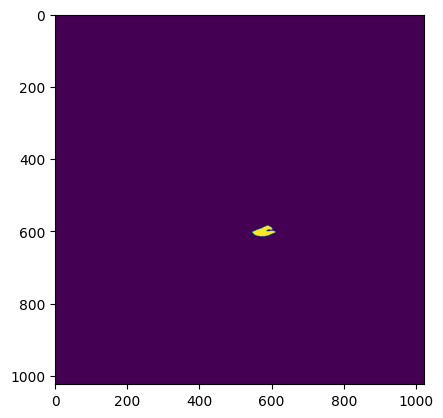

In [44]:
masks = json_to_mask("N00271097")
plt.imshow(masks[0])

bounding_boxes = torch.zeros((len(masks), 4), dtype=torch.float)
print(torch.mean(masks[0]))


for index, mask in enumerate(masks):
    x, y = torch.where(mask != 0.0)
    print(x.shape)
    print(y.shape)

    bounding_boxes[index, 0] = torch.min(x)
    bounding_boxes[index, 1] = torch.min(y)
    bounding_boxes[index, 2] = torch.max(x)
    bounding_boxes[index, 3] = torch.max(y)

print(bounding_boxes)

In [2]:
#Now test the dataset
from utils.params import Params
import dataset

transforms = None
params = Params("hparams.yaml", "DEFAULT")
train_data = dataset.CloudsDataset(params, transforms=None, root="Dataset/",  split="train")


ModuleNotFoundError: No module named 'utils.params'; 'utils' is not a package

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
#!python eval.py maskrcnn_v0 0.05
#!python eval.py maskrcnn_v0 0.1
#!python eval.py maskrcnn_v0 0.15
#!python eval.py maskrcnn_v0 0.2
!python eval.py maskrcnn_v0 0.25
!python eval.py maskrcnn_v0 0.3
!python eval.py maskrcnn_v0 0.35
!python eval.py maskrcnn_v0 0.4
!python eval.py maskrcnn_v0 0.45
!python eval.py maskrcnn_v0 0.5
!python eval.py maskrcnn_v0 0.55
!python eval.py maskrcnn_v0 0.6
!python eval.py maskrcnn_v0 0.65
!python eval.py maskrcnn_v0 0.7
!python eval.py maskrcnn_v0 0.75
!python eval.py maskrcnn_v0 0.8
!python eval.py maskrcnn_v0 0.85
!python eval.py maskrcnn_v0 0.9
!python eval.py maskrcnn_v0 0.95



Preparing to test maskrcnn_v0
Number of parameters: 43922395
Threshold: 0.25
Loss: 1.0841, Avg. MSE: 0.0108, Avg. Score 0.0000, Avg. IoU 0.6806, Avg. Acc 0.9809, Avg. Prec, 0.7501, Avg. Rec 0.8979
Global Accuracy: 0.887, Global Precision: 0.799, Global Recall: 0.887



100%|##########| 26/26 [17:19<00:00, 37.02s/it]
                                               


Preparing to test maskrcnn_v0
Number of parameters: 43922395
Threshold: 0.3
Loss: 1.0129, Avg. MSE: 0.0101, Avg. Score 0.0000, Avg. IoU 0.6902, Avg. Acc 0.9822, Avg. Prec, 0.7687, Avg. Rec 0.8882
Global Accuracy: 0.887, Global Precision: 0.799, Global Recall: 0.887



100%|##########| 26/26 [17:47<00:00, 37.34s/it]
                                               


Preparing to test maskrcnn_v0
Number of parameters: 43922395
Threshold: 0.35
Loss: 0.9564, Avg. MSE: 0.0096, Avg. Score 0.0000, Avg. IoU 0.6977, Avg. Acc 0.9832, Avg. Prec, 0.7856, Avg. Rec 0.8780
Global Accuracy: 0.887, Global Precision: 0.799, Global Recall: 0.887



100%|##########| 26/26 [17:43<00:00, 37.05s/it]
                                               


Preparing to test maskrcnn_v0
Number of parameters: 43922395
Threshold: 0.4
Loss: 0.9123, Avg. MSE: 0.0091, Avg. Score 0.0000, Avg. IoU 0.7033, Avg. Acc 0.9840, Avg. Prec, 0.8018, Avg. Rec 0.8668
Global Accuracy: 0.887, Global Precision: 0.799, Global Recall: 0.887



100%|##########| 26/26 [17:27<00:00, 36.93s/it]
                                               


Preparing to test maskrcnn_v0
Number of parameters: 43922395
Threshold: 0.45
Loss: 0.8789, Avg. MSE: 0.0088, Avg. Score 0.0000, Avg. IoU 0.7066, Avg. Acc 0.9846, Avg. Prec, 0.8168, Avg. Rec 0.8545
Global Accuracy: 0.887, Global Precision: 0.799, Global Recall: 0.887



100%|##########| 26/26 [17:20<00:00, 37.02s/it]
                                               


Preparing to test maskrcnn_v0
Number of parameters: 43922395
Threshold: 0.5
Loss: 0.8547, Avg. MSE: 0.0085, Avg. Score 0.0000, Avg. IoU 0.7077, Avg. Acc 0.9850, Avg. Prec, 0.8309, Avg. Rec 0.8408
Global Accuracy: 0.887, Global Precision: 0.799, Global Recall: 0.887



100%|##########| 26/26 [17:19<00:00, 36.65s/it]
                                               


Preparing to test maskrcnn_v0
Number of parameters: 43922395
Threshold: 0.55
Loss: 0.8395, Avg. MSE: 0.0084, Avg. Score 0.0000, Avg. IoU 0.7063, Avg. Acc 0.9852, Avg. Prec, 0.8441, Avg. Rec 0.8256
Global Accuracy: 0.887, Global Precision: 0.799, Global Recall: 0.887



100%|##########| 26/26 [17:24<00:00, 36.94s/it]
                                               


Preparing to test maskrcnn_v0
Number of parameters: 43922395
Threshold: 0.6
Loss: 0.8340, Avg. MSE: 0.0083, Avg. Score 0.0000, Avg. IoU 0.7019, Avg. Acc 0.9853, Avg. Prec, 0.8566, Avg. Rec 0.8082
Global Accuracy: 0.887, Global Precision: 0.799, Global Recall: 0.887



100%|##########| 26/26 [17:33<00:00, 37.00s/it]
                                               


Preparing to test maskrcnn_v0
Number of parameters: 43922395
Threshold: 0.65
Loss: 0.8376, Avg. MSE: 0.0084, Avg. Score 0.0000, Avg. IoU 0.6949, Avg. Acc 0.9852, Avg. Prec, 0.8683, Avg. Rec 0.7890
Global Accuracy: 0.887, Global Precision: 0.799, Global Recall: 0.887



100%|##########| 26/26 [17:17<00:00, 36.77s/it]
                                               


Preparing to test maskrcnn_v0
Number of parameters: 43922395
Threshold: 0.7
Loss: 0.8520, Avg. MSE: 0.0085, Avg. Score 0.0000, Avg. IoU 0.6842, Avg. Acc 0.9849, Avg. Prec, 0.8798, Avg. Rec 0.7664
Global Accuracy: 0.887, Global Precision: 0.799, Global Recall: 0.887



100%|##########| 26/26 [17:16<00:00, 36.72s/it]
                                               


Preparing to test maskrcnn_v0
Number of parameters: 43922395
Threshold: 0.75
Loss: 0.8783, Avg. MSE: 0.0088, Avg. Score 0.0000, Avg. IoU 0.6701, Avg. Acc 0.9844, Avg. Prec, 0.8911, Avg. Rec 0.7409
Global Accuracy: 0.887, Global Precision: 0.799, Global Recall: 0.887



100%|##########| 26/26 [17:19<00:00, 37.00s/it]
                                               


Preparing to test maskrcnn_v0
Number of parameters: 43922395
Threshold: 0.8
Loss: 0.9190, Avg. MSE: 0.0092, Avg. Score 0.0000, Avg. IoU 0.6498, Avg. Acc 0.9836, Avg. Prec, 0.9018, Avg. Rec 0.7099
Global Accuracy: 0.887, Global Precision: 0.799, Global Recall: 0.887



100%|##########| 26/26 [17:40<00:00, 38.64s/it]
                                               


Preparing to test maskrcnn_v0
Number of parameters: 43922395
Threshold: 0.85
Loss: 0.9781, Avg. MSE: 0.0098, Avg. Score 0.0000, Avg. IoU 0.6223, Avg. Acc 0.9825, Avg. Prec, 0.9124, Avg. Rec 0.6719
Global Accuracy: 0.887, Global Precision: 0.799, Global Recall: 0.887



100%|##########| 26/26 [17:42<00:00, 37.92s/it]
                                               


Preparing to test maskrcnn_v0
Number of parameters: 43922395
Threshold: 0.9
Loss: 1.0671, Avg. MSE: 0.0107, Avg. Score 0.0000, Avg. IoU 0.5809, Avg. Acc 0.9808, Avg. Prec, 0.9233, Avg. Rec 0.6197
Global Accuracy: 0.887, Global Precision: 0.799, Global Recall: 0.887



100%|##########| 26/26 [17:24<00:00, 36.97s/it]
                                               


Preparing to test maskrcnn_v0
Number of parameters: 43922395
Threshold: 0.95
Loss: 1.2260, Avg. MSE: 0.0123, Avg. Score 0.0000, Avg. IoU 0.5116, Avg. Acc 0.9778, Avg. Prec, 0.9367, Avg. Rec 0.5391
Global Accuracy: 0.887, Global Precision: 0.799, Global Recall: 0.887



100%|##########| 26/26 [17:18<00:00, 36.84s/it]
                                               
